# Exploratory analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('coin data/analyses/data-agg.csv')
data.head()

,heads_heads,tails_heads,N_start_heads_up,N_start_tails_up,person,coin
0,244,240,485,515,frantisekB,20DEM-silver
1,260,245,505,495,frantisekB,1CZK
2,209,260,469,531,frantisekB,5CZK
3,530,495,1021,979,frantisekB,0.25USD
4,533,507,1039,961,frantisekB,10CZK


C:\Users\julso\AppData\Local\Temp\ipykernel_365428\3851453614.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  person_aggregated = data.groupby('person').apply(
C:\Users\julso\AppData\Local\Temp\ipykernel_365428\3851453614.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (data.groupby('person').apply(
C:\Users\julso\AppData\Local\Temp\ipykernel_365428\3851453614.py:23: DeprecationWarning: DataFrameGr

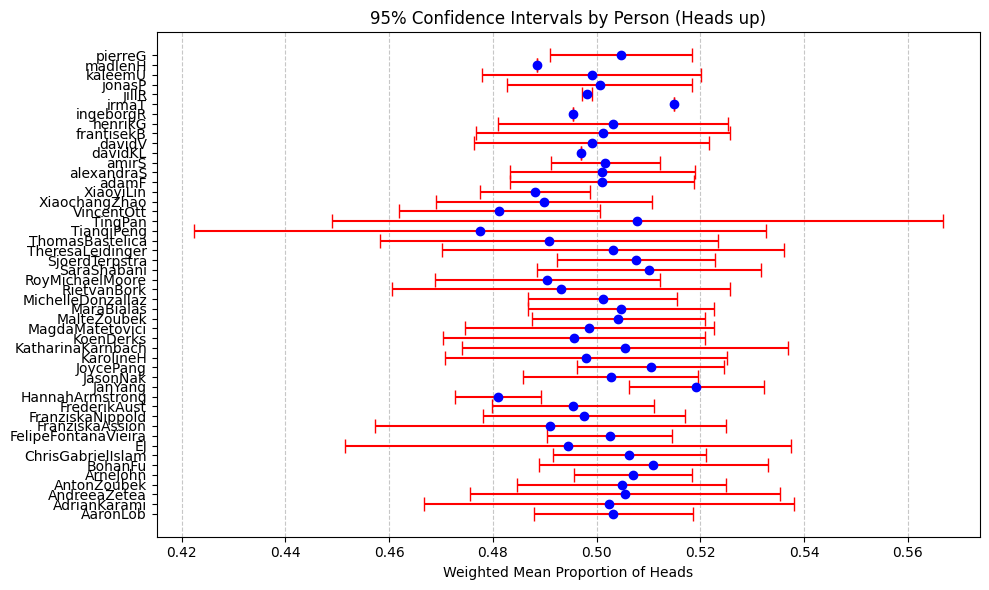

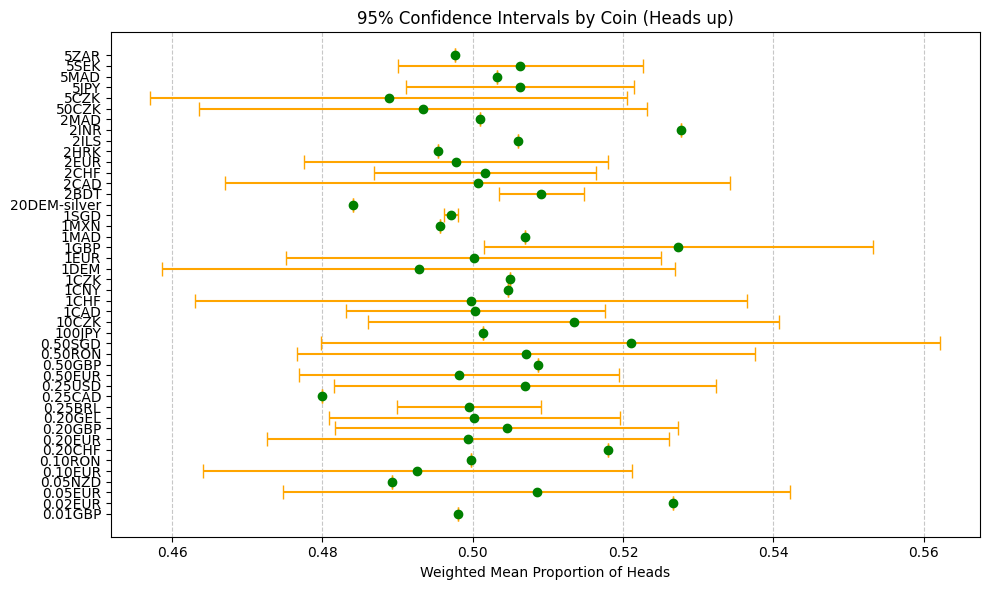

In [18]:
# Correct the proportion calculation to include all heads outcomes
data['total_tosses'] = data['N_start_heads_up'] + data['N_start_tails_up']
data['proportion_heads'] = (data['heads_heads'] + data['tails_heads']) / data['total_tosses']

# Weighted mean and CI calculation for persons (using all tosses)
person_aggregated = data.groupby('person').apply(
    lambda group: pd.Series({
        'weighted_mean': np.average(group['proportion_heads'], weights=group['total_tosses']),
        'total_tosses': group['total_tosses'].sum(),
    })
)
person_aggregated['SE'] = np.sqrt(
    (data.groupby('person').apply(
        lambda group: np.sum(group['total_tosses'] *
                             (group['proportion_heads'] - np.average(group['proportion_heads'], weights=group['total_tosses'])) ** 2)
    ) / person_aggregated['total_tosses'])
)
person_aggregated['ME'] = 1.96 * person_aggregated['SE']
person_aggregated['CI_lower'] = person_aggregated['weighted_mean'] - person_aggregated['ME']
person_aggregated['CI_upper'] = person_aggregated['weighted_mean'] + person_aggregated['ME']

# Weighted mean and CI calculation for coins (using all tosses)
coin_aggregated = data.groupby('coin').apply(
    lambda group: pd.Series({
        'weighted_mean': np.average(group['proportion_heads'], weights=group['total_tosses']),
        'total_tosses': group['total_tosses'].sum(),
    })
)
coin_aggregated['SE'] = np.sqrt(
    (data.groupby('coin').apply(
        lambda group: np.sum(group['total_tosses'] *
                             (group['proportion_heads'] - np.average(group['proportion_heads'], weights=group['total_tosses'])) ** 2)
    ) / coin_aggregated['total_tosses'])
)
coin_aggregated['ME'] = 1.96 * coin_aggregated['SE']
coin_aggregated['CI_lower'] = coin_aggregated['weighted_mean'] - coin_aggregated['ME']
coin_aggregated['CI_upper'] = coin_aggregated['weighted_mean'] + coin_aggregated['ME']

# Plot for people (corrected proportions)
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(
    person_aggregated['weighted_mean'],
    person_aggregated.index,
    xerr=[
        person_aggregated['weighted_mean'] - person_aggregated['CI_lower'],
        person_aggregated['CI_upper'] - person_aggregated['weighted_mean']
    ],
    fmt='o',
    color='blue',
    ecolor='red',
    capsize=5
)
ax.set_xlabel('Weighted Mean Proportion of Heads')
ax.set_title('95% Confidence Intervals by Person (Heads up)')
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for coins (corrected proportions)
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(
    coin_aggregated['weighted_mean'],
    coin_aggregated.index,
    xerr=[
        coin_aggregated['weighted_mean'] - coin_aggregated['CI_lower'],
        coin_aggregated['CI_upper'] - coin_aggregated['weighted_mean']
    ],
    fmt='o',
    color='green',
    ecolor='orange',
    capsize=5
)
ax.set_xlabel('Weighted Mean Proportion of Heads')
ax.set_title('95% Confidence Intervals by Coin (Heads up)')
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\julso\AppData\Local\Temp\ipykernel_365428\889713912.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  person_aggregated_same = data.groupby('person').apply(
C:\Users\julso\AppData\Local\Temp\ipykernel_365428\889713912.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  (data.groupby('person').apply(
C:\Users\julso\AppData\Local\Temp\ipykernel_365428\889713912.py:30: DeprecationWarning: DataFram

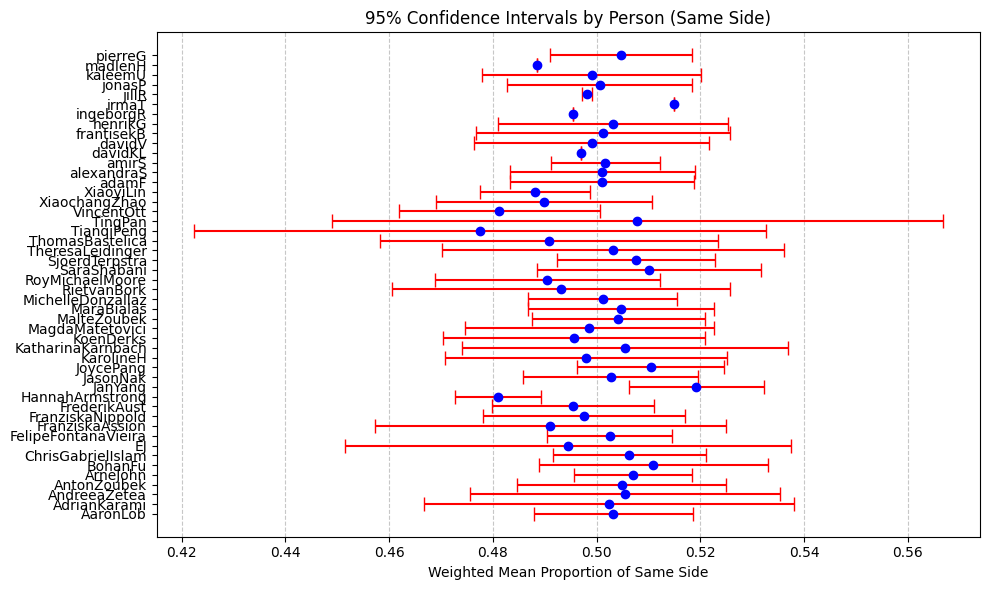

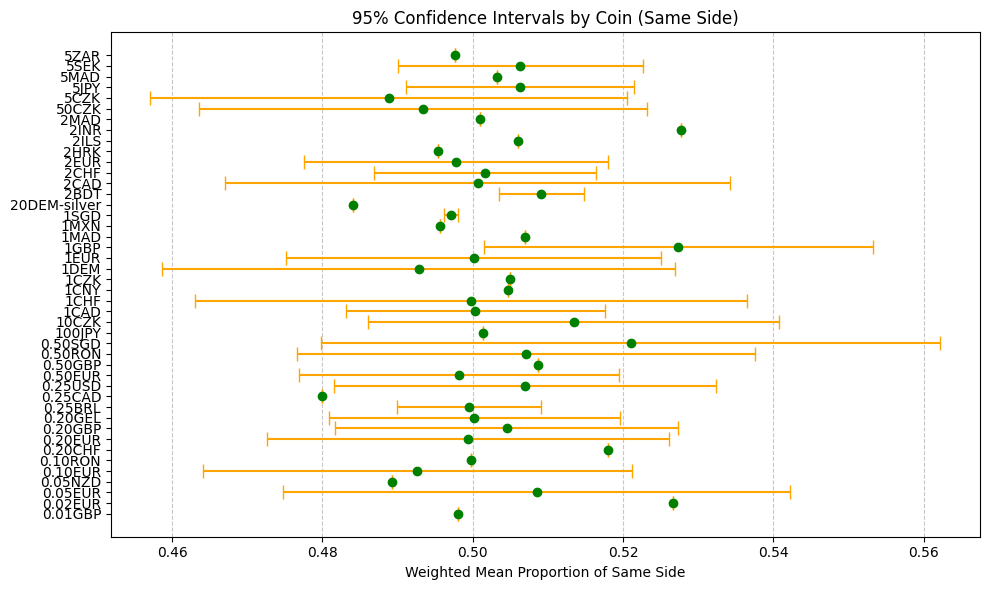

In [ ]:
# Correct the proportion calculation to include tosses landing on the same side
data['total_tosses'] = data['N_start_heads_up'] + data['N_start_tails_up']
data['proportion_same_side'] = (data['heads_heads'] + data['tails_heads']) / data['total_tosses']

# Weighted mean and CI calculation for persons (same side)
person_aggregated_same = data.groupby('person').apply(
    lambda group: pd.Series({
        'weighted_mean': np.average(group['proportion_same_side'], weights=group['total_tosses']),
        'total_tosses': group['total_tosses'].sum(),
    })
)
person_aggregated_same['SE'] = np.sqrt(
    (data.groupby('person').apply(
        lambda group: np.sum(group['total_tosses'] *
                             (group['proportion_same_side'] - np.average(group['proportion_same_side'], weights=group['total_tosses'])) ** 2)
    ) / person_aggregated_same['total_tosses'])
)
person_aggregated_same['ME'] = 1.96 * person_aggregated_same['SE']
person_aggregated_same['CI_lower'] = person_aggregated_same['weighted_mean'] - person_aggregated_same['ME']
person_aggregated_same['CI_upper'] = person_aggregated_same['weighted_mean'] + person_aggregated_same['ME']

# Weighted mean and CI calculation for coins (same side)
coin_aggregated_same = data.groupby('coin').apply(
    lambda group: pd.Series({
        'weighted_mean': np.average(group['proportion_same_side'], weights=group['total_tosses']),
        'total_tosses': group['total_tosses'].sum(),
    })
)
coin_aggregated_same['SE'] = np.sqrt(
    (data.groupby('coin').apply(
        lambda group: np.sum(group['total_tosses'] *
                             (group['proportion_same_side'] - np.average(group['proportion_same_side'], weights=group['total_tosses'])) ** 2)
    ) / coin_aggregated_same['total_tosses'])
)
coin_aggregated_same['ME'] = 1.96 * coin_aggregated_same['SE']
coin_aggregated_same['CI_lower'] = coin_aggregated_same['weighted_mean'] - coin_aggregated_same['ME']
coin_aggregated_same['CI_upper'] = coin_aggregated_same['weighted_mean'] + coin_aggregated_same['ME']

# Plot for people (same side proportion)
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(
    person_aggregated_same['weighted_mean'],
    person_aggregated_same.index,
    xerr=[
        person_aggregated_same['weighted_mean'] - person_aggregated_same['CI_lower'],
        person_aggregated_same['CI_upper'] - person_aggregated_same['weighted_mean']
    ],
    fmt='o',
    color='blue',
    ecolor='red',
    capsize=5
)
ax.set_xlabel('Weighted Mean Proportion of Same Side')
ax.set_title('95% Confidence Intervals by Person (Same Side)')
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for coins (same side proportion)
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(
    coin_aggregated_same['weighted_mean'],
    coin_aggregated_same.index,
    xerr=[
        coin_aggregated_same['weighted_mean'] - coin_aggregated_same['CI_lower'],
        coin_aggregated_same['CI_upper'] - coin_aggregated_same['weighted_mean']
    ],
    fmt='o',
    color='green',
    ecolor='orange',
    capsize=5
)
ax.set_xlabel('Weighted Mean Proportion of Same Side')
ax.set_title('95% Confidence Intervals by Coin (Same Side)')
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
